<a href="https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_04/TG4_2341720056_Rizkya_Salsabila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LINK PENGERJAAN SECARA KESELURUHAN](https://colab.research.google.com/github/RizkyaSalsabila/Assignment-Sem5_ML_Rizkya-Salsabila/blob/main/praktikum_04/TG4_2341720056_Rizkya_Salsabila.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PRAKTIKUM 1

### Langkah 1 - Persiapan Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/TUGAS/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Langkah 2 - Seleksi Fitur

In [5]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Langkah 3 - Plot Data

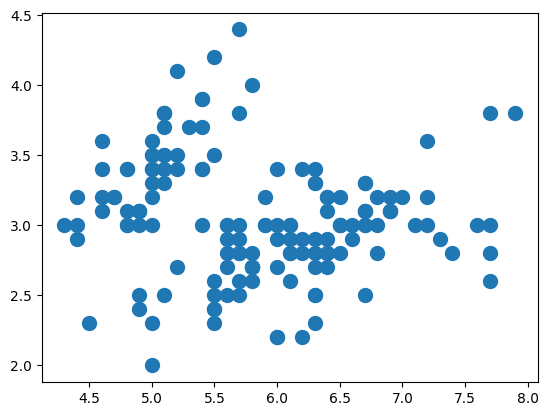

In [9]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

### Langkah 4 - Model K-Means

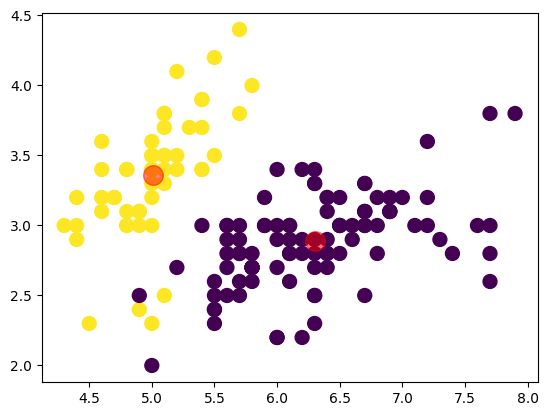

In [8]:
# Buat Model KMeans dengan menggunakan k=2
# (anggap saja kita tidak tahu jumlah label ada 3 :))

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Langkah 5 - Cek Nilai SSE

In [10]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


### Langkah 6 - Metode Elbow

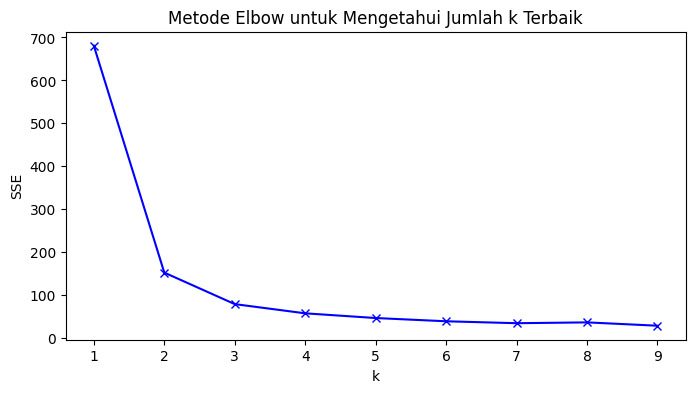

In [11]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

### Langkah 7 - Nilai SSE tiap k

In [12]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=46.535582051282034
k=6; SSE=38.96478785103787
k=7; SSE=34.46540901771336
k=8; SSE=36.39579485943121
k=9; SSE=28.611091170244


# PRAKTIKUM 2

### Langkah 1 - Import Library

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Pengantar K-Means

### Langkah 2 - Scatter Plot 300 titik (4 cluster)

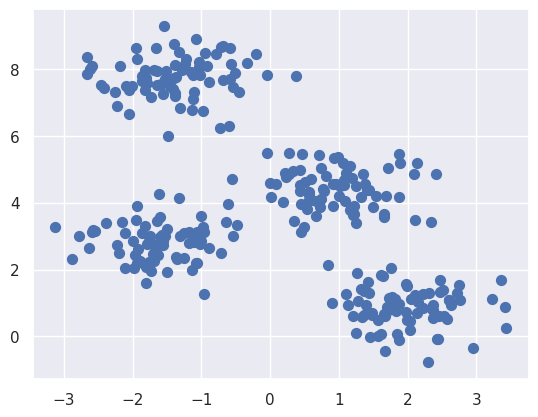

In [14]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

### Langkah 3 - Hasil Clustering k-Means 4 cluster

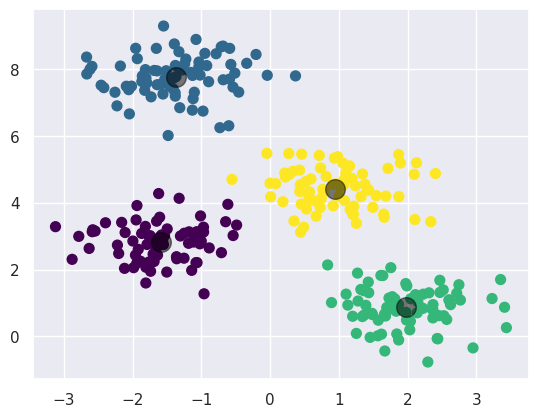

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation - Maximization

### Langkah 4 - Clustering dengan k-Means dari awal

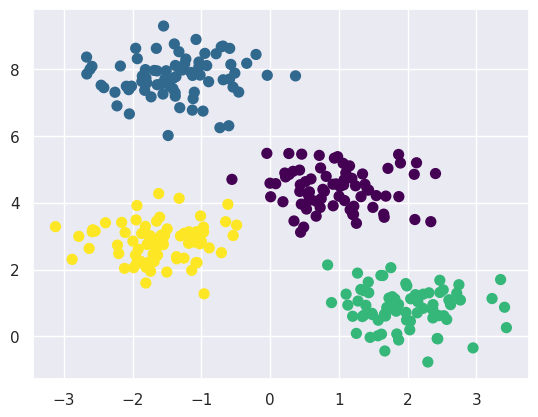

In [18]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Langkah 5 - Perubahan Random

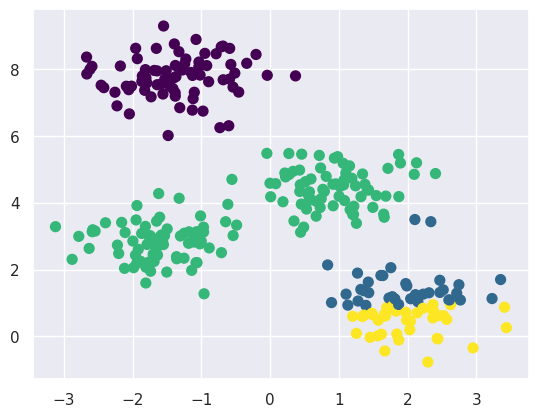

In [19]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Langkah 6 - Optimalisasi Jumlah Klaster

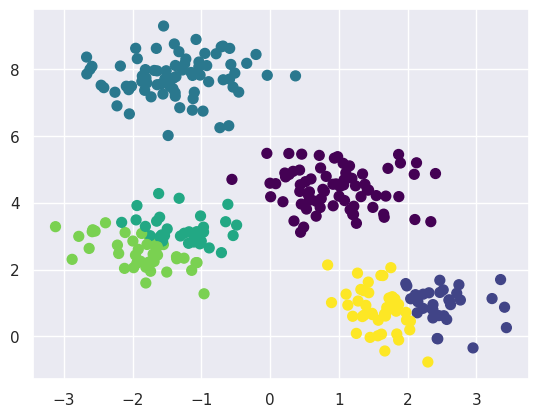

In [20]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

### Langkah 7 - Batas Klaster yang Tidak Selalu Linier

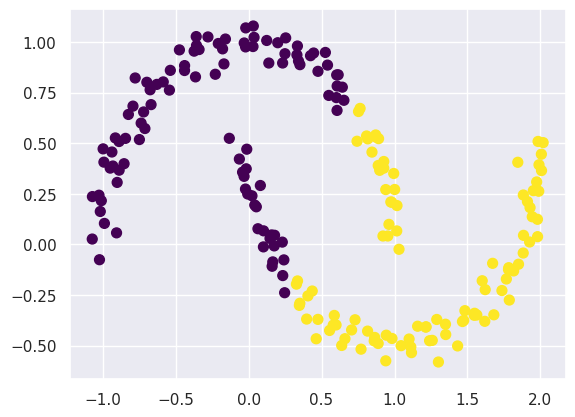

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

### Langkah 8 - Clustering dengan Spectral Clustering (2 cluster)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


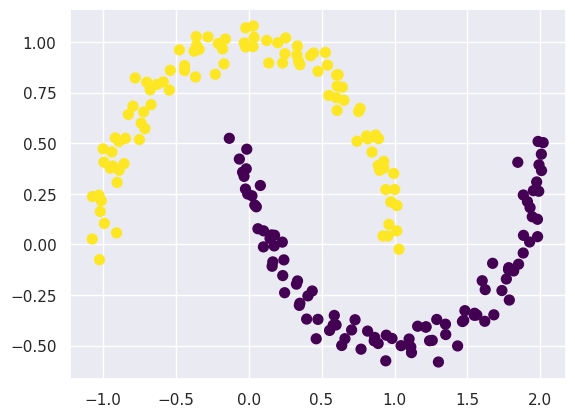

In [24]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh Kasus 1: Karakter Angka

### Langkah 9 - Shape Dataset Digits

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

### Langkah 10 - Penerapan k-means

In [26]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

### Langkah 11 - Cluster Centers sebagai Gambar Digit

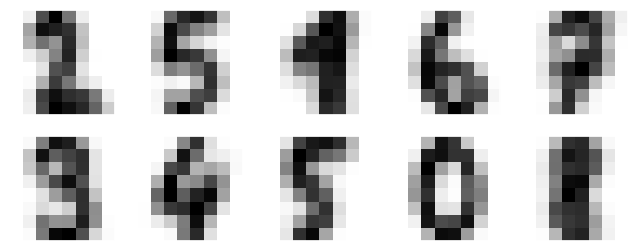

In [28]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Langkah 12 - Evaluasi Akurasi k-Means pada Dataset Digits

In [30]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

### Langkah 13 - Heatmap Evaluasi Clustering Digits

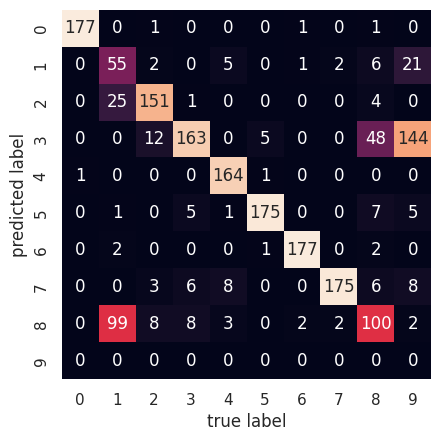

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Langkah 14 - Clustering Digits dengan t-SNE + k-Means

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

## Studi Kasus 2: Kompresi Citra

### Langkah 15 - Visualisasi Sample Image: Flower

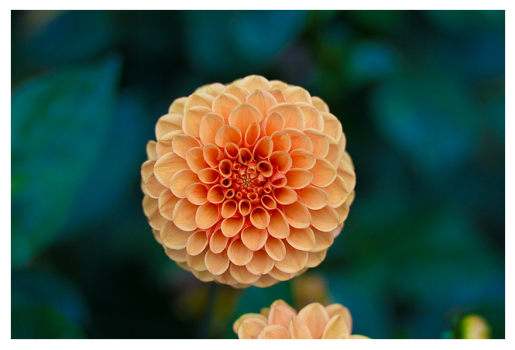

In [34]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

### Langkah 16 - Shape Flower

In [35]:
flower.shape

(427, 640, 3)

### Langkah 17 - Transformasi Gambar Flower ke Dataset Piksel (RGB)

In [39]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

### Langkah 18 - Distribusi Piksel di Color Space

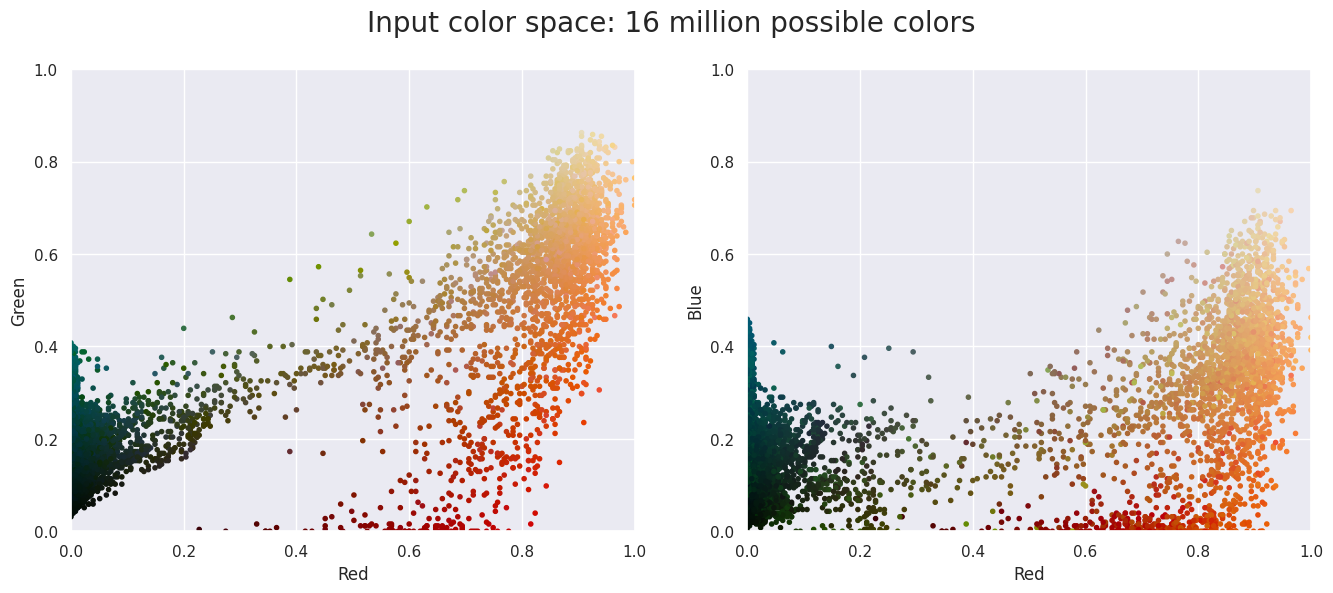

In [40]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

plot_pixels(data, title='Input color space: 16 million possible colors')

### Langkah 19 - Reduksi Warna Gambar dengan MiniBatchKMeans (16 Warna)

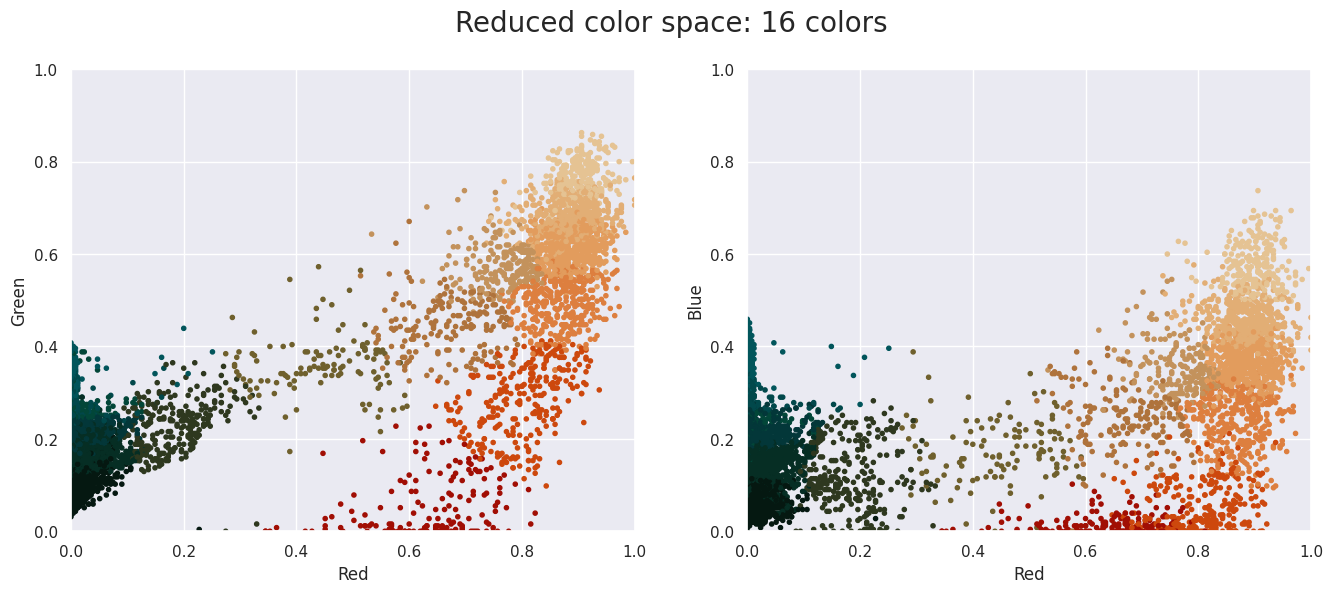

In [41]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

### Langkah 20 - Perbandingan Citra Asli dan Citra Hasil Reduksi Warna (16 Warna)

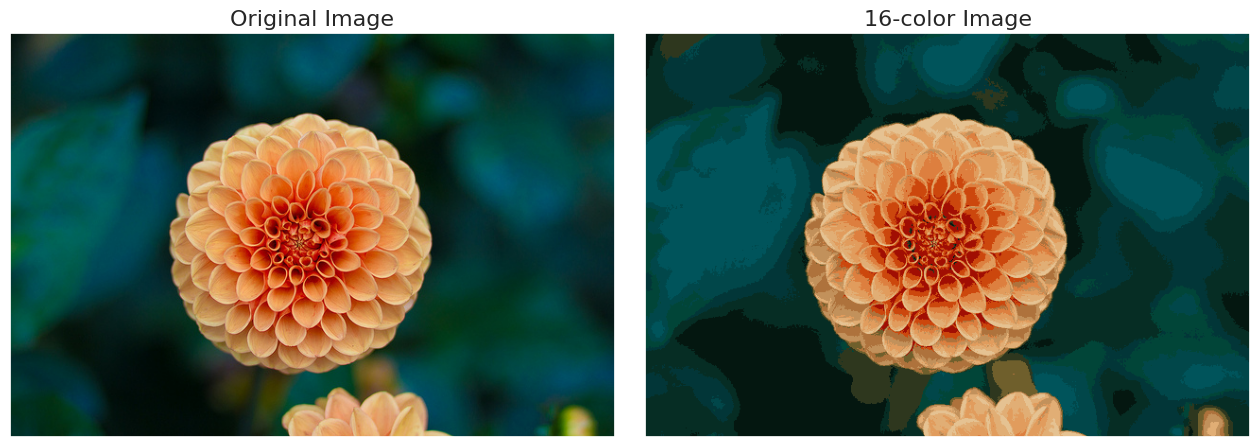

In [42]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# PRAKTIKUM 3

### Langkah 1 - Pembuatan Dataset Sintetis

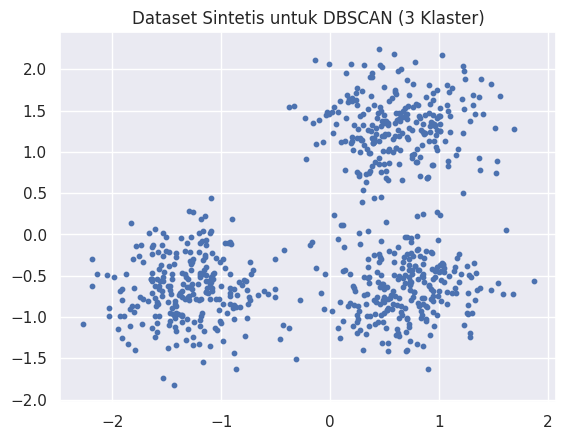

In [48]:
import warnings; warnings.simplefilter('ignore')  # biar warning ga ganggu

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Buat dataset blob
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Normalisasi data
X = StandardScaler().fit_transform(X)

# Visualisasi dataset
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset Sintetis untuk DBSCAN (3 Klaster)")
plt.show()

### Langkah 2 - Compute DBSCAN

In [53]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN  # ✅ ini yang kurang

# Fit model DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Hitung jumlah cluster & noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


### Langkah 3 - Evaluasi Kualitas Klasterisasi

In [55]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


### Langkah 4 - Visualisasi Hasil Klasterisasi

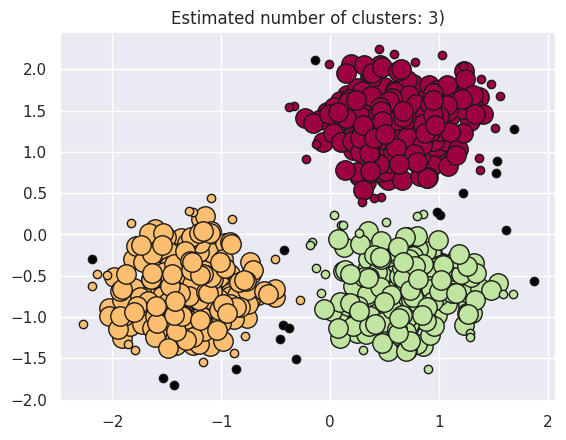

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Mask core samples (benar)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Warna untuk tiap cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0], xy[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_})")
plt.show()

# TUGAS PRAKTIKUM

##Tugas K-Means

### 1A. Buatlah sebuah model K-Means dengan ketentuan,

a. Gunakan data 'Mall_Customers.csv'

b. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

c. Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.

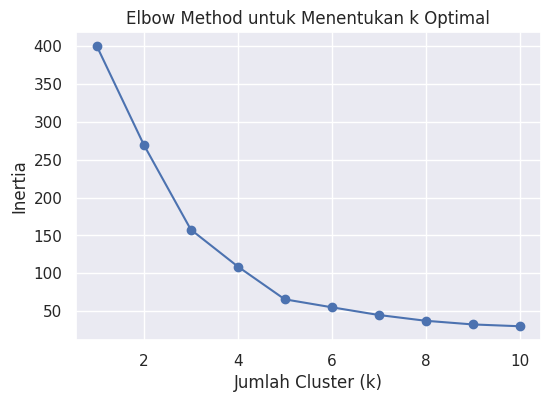

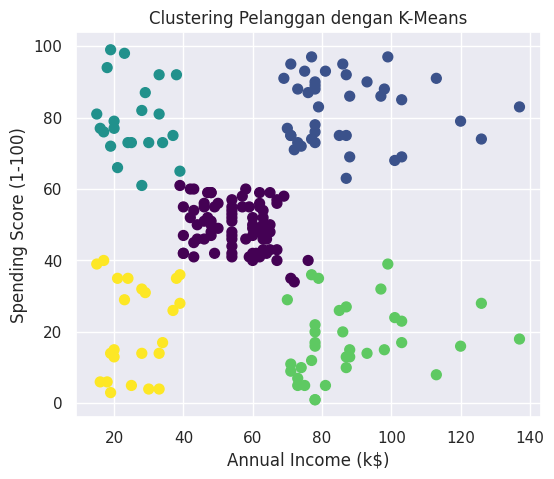

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/NEED/Mall_Customers.csv')

# 2. Pilih fitur
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

# 5. Buat model KMeans dengan k=5 (hasil dari Elbow)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Visualisasi hasil clustering
plt.figure(figsize=(6,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Pelanggan dengan K-Means')
plt.show()

# 7. Lihat hasil clustering
print(df.head())

### 1B. Buatlah sebuah model K-Means dengan ketentuan,

a. Gunakan dataset kelas 3D TI

b. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

c. Buatlah model K-Means dengan mempertimbangkan jumlah
k
k yang terbaik.

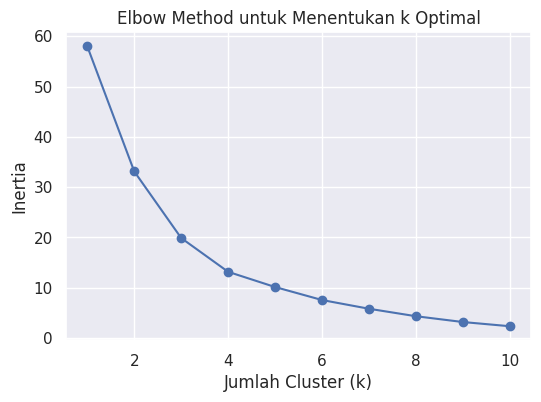

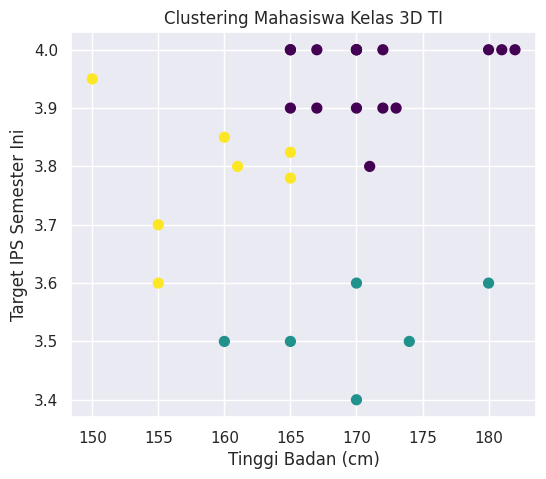

                     Nama lengkap  Tinggi badan (cm)  Target IPS semester ini  \
0             Nahdia Putri Safira                165                     3.78   
1                   M. Firmansyah                170                     3.40   
2  Ivansyah Eka Oktaviadi Santoso                174                     3.50   
3              Aida Rahma Fadhila                150                     3.95   
4            Aryan Saputra Rahmad                170                     4.00   

   Cluster  
0        2  
1        1  
2        1  
3        2  
4        0  


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv('/content/drive/MyDrive/RIZKYA S/SEMESTER_5/ML/TUGAS/Data Mahasiswa Kelas TI-3D - Form Responses 1.csv')

# 2. Perbaiki kolom "Target IPS semester ini" (ganti koma jadi titik, ubah ke float)
df['Target IPS semester ini'] = df['Target IPS semester ini'].astype(str).str.replace(',', '.', regex=False).astype(float)

# 3. Pilih fitur numerik
X = df[['Tinggi badan (cm)', 'Target IPS semester ini']]

# 4. Tangani missing values (isi dengan mean tiap kolom)
X = X.fillna(X.mean())
df = df.copy()
df[['Tinggi badan (cm)', 'Target IPS semester ini']] = X

# 5. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Elbow Method untuk cari k optimal
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()

# 7. Buat model KMeans dengan k=3 (contoh hasil Elbow)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 8. Visualisasi hasil clustering
plt.figure(figsize=(6,5))
plt.scatter(df['Tinggi badan (cm)'], df['Target IPS semester ini'],
            c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Target IPS Semester Ini')
plt.title('Clustering Mahasiswa Kelas 3D TI')
plt.show()

# 9. Tampilkan hasil clustering
print(df[['Nama lengkap', 'Tinggi badan (cm)', 'Target IPS semester ini', 'Cluster']].head())

## Tugas DBSCAN


### a. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

### b. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

### c. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

### d. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

### e. Lakukan eksperimen:
  - eps = 0.05, 0.1, 0.3, 0.5

  - min_samples = 3, 10, 20

  - Catat perubahan klaster, noise, dan kualitas evaluasi.

Hasil DBSCAN eps=0.2, min_samples=5:
eps: 0.2
min_samples: 5
clusters: 2
noise: 0
homogeneity: 1.0
completeness: 1.0
v_measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


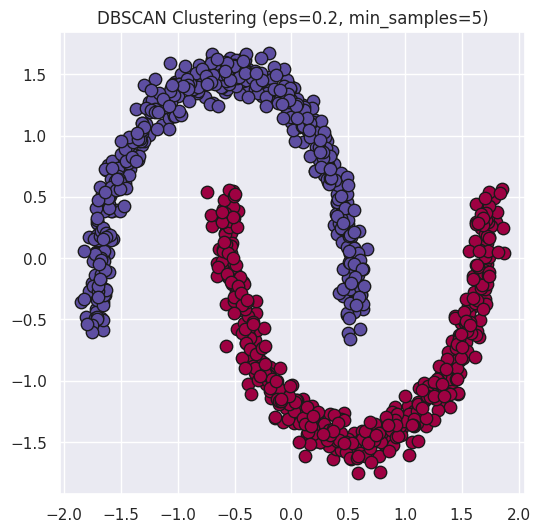


Hasil Eksperimen DBSCAN:
     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05           10         3    970     0.030669      0.126764   0.049389   
2   0.05           20         0   1000     0.000000      1.000000   0.000000   
3   0.10            3         2     14     0.986207      0.902896   0.942714   
4   0.10           10         7     57     0.943317      0.409546   0.571132   
5   0.10           20         6    850     0.153928      0.155466   0.154693   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         2      0     1.000000      1.000000   1.000000   
10  0.50           10         2      0     1.000000      1.000000   1.000000   
11  0.50      

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# 1. Buat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalisasi
X = StandardScaler().fit_transform(X)

# Fungsi bantu untuk menjalankan DBSCAN + evaluasi
def run_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Jumlah cluster (tidak termasuk noise = -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Evaluasi (cek kalau ada cluster lebih dari 1 untuk silhouette)
    if n_clusters > 1:
        silhouette = silhouette_score(X, labels)
    else:
        silhouette = np.nan

    scores = {
        "eps": eps,
        "min_samples": min_samples,
        "clusters": n_clusters,
        "noise": n_noise,
        "homogeneity": homogeneity_score(y_true, labels),
        "completeness": completeness_score(y_true, labels),
        "v_measure": v_measure_score(y_true, labels),
        "ARI": adjusted_rand_score(y_true, labels),
        "AMI": adjusted_mutual_info_score(y_true, labels),
        "Silhouette": silhouette
    }
    return labels, scores

# 3. DBSCAN dengan eps=0.2, min_samples=5
labels, scores = run_dbscan(0.2, 5)
print("Hasil DBSCAN eps=0.2, min_samples=5:")
for k,v in scores.items():
    print(f"{k}: {v}")

# 4. Visualisasi hasil
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[DBSCAN(eps=0.2, min_samples=5).fit(X).core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(6,6))
for k, col in zip(unique_labels, colors):
    if k == -1:  # noise → hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=80, c=[col], marker='o', edgecolors='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], marker='o', edgecolors='k')

plt.title("DBSCAN Clustering (eps=0.2, min_samples=5)")
plt.show()

# 5. Eksperimen parameter
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []
for eps in eps_values:
    for min_s in min_samples_values:
        _, score = run_dbscan(eps, min_s)
        results.append(score)

# 6. Tampilkan hasil eksperimen
import pandas as pd
df_results = pd.DataFrame(results)
print("\nHasil Eksperimen DBSCAN:")
print(df_results)